# **Análisis Estadístico de Redes Sociales: Taller 2**

## Valentina Cardona Saldaña

Desarrollo de los ejercicios propuestos en el [Taller 2](https://www.dropbox.com/scl/fi/gncmfys1f4vh4jn9b9klj/Taller_2.pdf?rlkey=ak00y804yao89stj5m19nief1&e=1&dl=0) de la asignatura [Análisis Estadístico de Redes Sociales](https://sites.google.com/view/juansosa/social-networks), impartida por el profesor [Juan Sosa](https://github.com/jstats1702) como parte del programa de la Maestría en Ciencias - Estadística de la Universidad Nacional de Colombia.

In [1]:
# Paquetes
import pandas as pd
import numpy as np
import rdata

import igraph as ig
#import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Ejercicio 1

Reproducir los ejemplos 3.1, 3.2, 5.2, 5.3, 6.1 de [Conceptos fundamentales de teoría de grafos](https://rpubs.com/jstats1702/1126816) en Python usando igraph y/o NetworkX

#### 3.1 Ejemplo: Vecinos y Grado

In [20]:
# red no dirigida
g = ig.Graph.Formula("1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6, 4-7, 5-6, 6-7")

# Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7


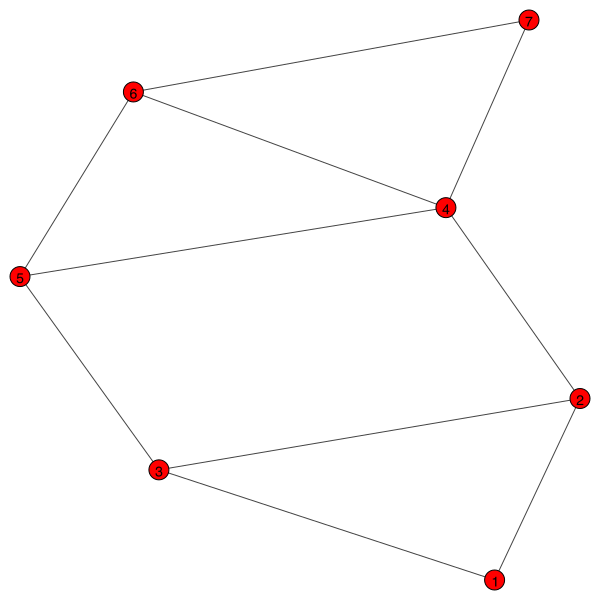

In [24]:
# visualización
np.random.seed(202403)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g)

In [33]:
# vecinos del vértice 1
g.neighborhood(0) ## Se introduce el ID del vértice

## Arroja una lista que incluye al mismo vértice de primeras

[0, 1, 2]

In [38]:
# grados

## Imprimir lista de vértices
print(g.vs['name'])

## El grado de cada vértice
print(g.degree())

['1', '2', '3', '4', '5', '6', '7']
[2, 3, 3, 4, 3, 3, 2]


#### 3.2 Ejemplo: Grado de entrada y Grado de salida

In [46]:
# red dirigida
dg = ig.Graph.Formula("1->2, 1->3, 2<->3")

## Vértices
dg.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3


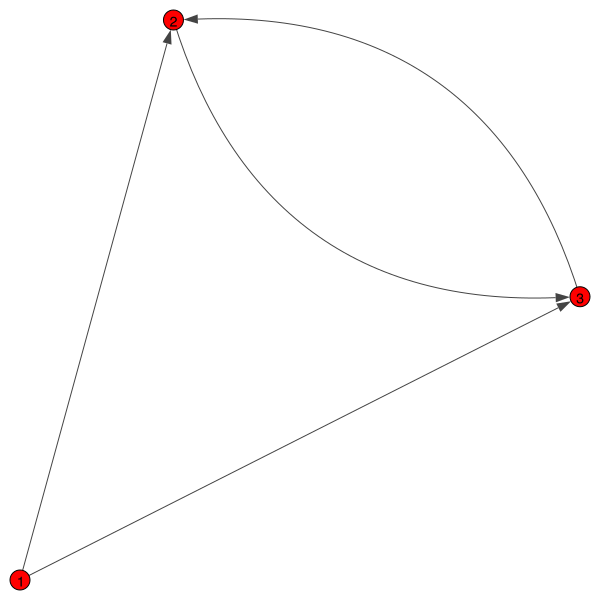

In [47]:
# visualización
np.random.seed(202403)

## Guardar los nombres de los vértices
dg.vs['label'] = range(1, dg.vcount()+1)

ig.plot(dg)

In [51]:
# grado de entrada

## Imprimir lista de vértices
print(dg.vs['name'])
## Grado
print(dg.indegree())

['1', '2', '3']
[0, 2, 2]


In [52]:
# grado de salida

## Imprimir lista de vértices
print(dg.vs['name'])
## Grado
print(dg.outdegree())

['1', '2', '3']
[2, 1, 1]


#### Ejemplo 5.2: 

In [69]:
# red no dirigida
g = ig.Graph(edges = [[1,7], [2,7], [2,4], [3,6], [4,7], [5,11], [6,12], [7,8], [7,9], [7,10]])

## Agregar nombres a red
g.vs['name'] = range(g.vcount()+1)
## Eliminar

## Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


In [ ]:
# visualización
np.random.seed(202403)

## Guardar los nombres de los vértices
dg.vs['label'] = range(1, dg.vcount()+1)

ig.plot(dg)

### Ejercicio 2

El grado de un nodo en una red tanto dirigida como no dirigida se puede calcular fácilmente a partir de la matriz de adyacencia ${Y}=[y_{i,j}]$. El *out-degree* $d_{i}^{out}$ y el *in-degree* $d_{i}^{in}$ del nodo $i$ se pueden calcular respectivamente como:

$$
d_{i}^{out} = \sum_{i:i\neq j} y_{i,j}
\qquad\text{y}\qquad
d_{i}^{in} = \sum_{j:j \neq i} y_{j,i}
$$

Muestre que si la red es no dirigida entonces $d_{i}^{out} = d_{i}^{in}$

### Ejercicio 3

### Ejercicio 4

### Ejercicio 5

### Ejercicio 6

### Ejercicio 7

### Ejercicio 8

### Ejercicio 9